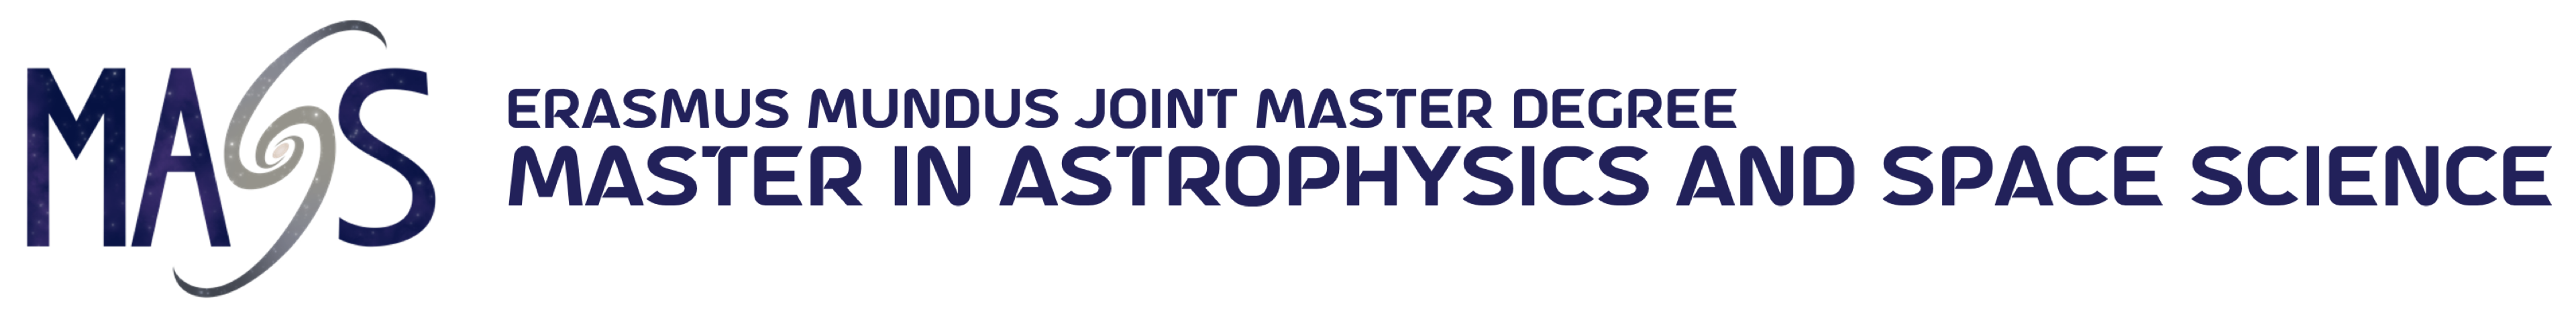

# Image Formation in a Telescope

## HW #2: Astrophysical Data Reduction and Analysis Techniques

06 Nov 2024

Student: Francesca Borg

Instructor: Prof. Dragana Ilić

Modern astrophysics is built upon observations, thus it is of great interest to understand how optical systems work and how they influence the formation of an image in the telescope focus. Every telescope is characterized by a set of optical elements. Refracting telescopes have lenses, while reflecting telescopes have a set of mirrors. Each optical element, due to its imperfections, introduces certain perturbation to the image of the observed object.

The appearance of the object image in the telescope's focus is described with the so-called 
Point Spread Function (PSF). The PSF describes the system's response to a point source. In its base it represents the diffraction pattern of a point source in the telescope's focus. Every optical system, based on its set of optical elements, will have a unique PSF. Figure 1 shows an example of the PSF in the system’s focus.

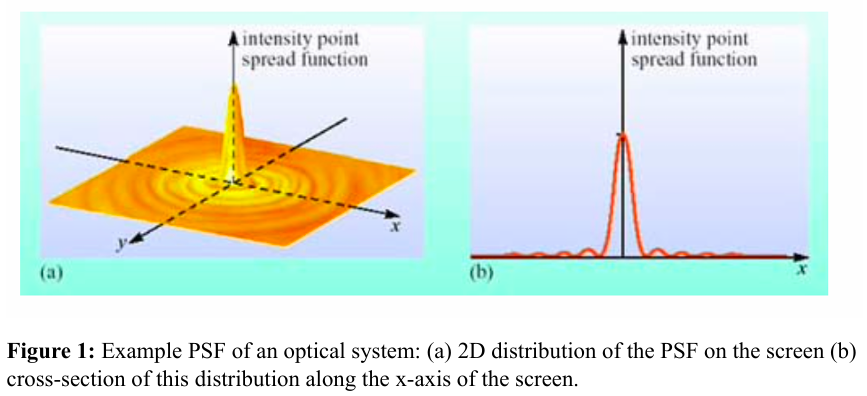

In this exercise, the aim is to explore how the PSF of an optical system is constructed and to examine its influence on the image formation in the system's focus. Since the telescope aperture is in most cases circular, we will focus on the ciruclar aperture. However modern, very large telescopes are segmented. These segments are hexagonal, and because of this, the telescope aperture is essentially hexagonal. 

## Point Spread Function - PSF

The PSF is essentially a diffraction image (distribution of radiation intensity) of the source projected in the focus of the optical system. In case of astronomical sources, which are are very distant point sources, the PSF is as a result of the Fraunhofer diffraction on the telescope apreture. According to Maxwell's electromagnetic theory, light is an electromagnetic wave, representing oscillations of electric and magnetic fields in space and time. The intensity of light is defined as the square of the intensity of the electric field. If we know the shape of the electric field vector at a given point in space, we can easily calculate the radiation intensity at that point, i.e., we can determine the PSF of the optical system.

Let’s consider a telescope of a circular aperture and calculate the electric field vector at a specific point behind the aperture. Let’s divide the aperture into small elements (smaller than the wavelength of the observed light, see Figure 2). From each of these small elements of the aperture, we can assume that a spherical wave arrives at point P (based on the Huygens-Fresnel principle). The total electric field vector will be the superposition of the electric field vectors of each of these waves (i.e. summing over the elements of the telescope's aperture). The assumption that the aperture segments are smaller than the wavelength guarantees that all waves will be in the same phase at point P. The value of the electric field at point P will depend on the position of the wave source (x, y) (the position of the surface element SdS) and the position of point P. The mathematical operation of superposing these waves at point P is actually a Fourier transformation of the wavefront at the aperture. This operation converts the shape of the wavefront at the aperture into its image on the detector located in the focus.

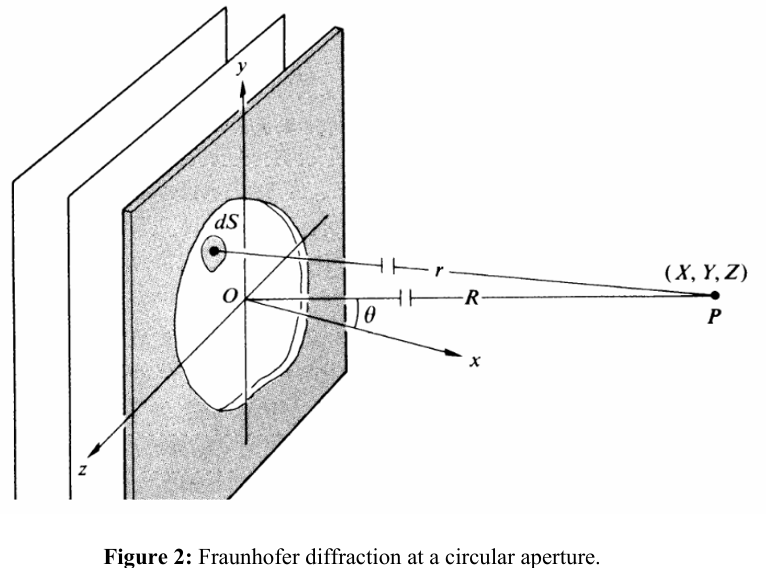

Since we assumed that a flat wave is arriving at the aperture, the wave will have the same phase at every point of the aperture, i.e., it will have a constant amplitude and phase. This holds only if there are no deformations to the wavefront (thiss will be discussed this in more detail later). From the previous explanation, we can conclude that the wavefront takes the shape of the telescope aperture (e.g., circular aperture), and from this, we get that the PSF is the square of the Fourier transform of the telescope aperture A:

$$PSF = |F(A(x,y))|^2$$

Depending on the shape of the aperture, we will have different PSF patterns. In the case of an ideal system, a flate wave and a circular aperture, the PSF in the focus has the shape of an Airy function.

**Task 1:** Calculate the PSF for a circular aperture. Assume that the telescope has a circular aperture with a radius of 128, 64, and 32, within the field of 256×256 size.

In [1]:
#import necessary packages
import numpy as np
import scipy
import matplotlib.pyplot as plt

For a circular aperture: $A(x,y)=x^2+y^2$

So that points inside the aperture have $(x-x_0)^2+(y-y_0)^2\le r$, where $x_0$ and $y_0$ are the coordinates of the centre, which lies at the center of the field, and $r$ is the radius of the aperture.

In [2]:
field_size = 256
field_center = field_size//2
print(field_center)

128


Thus, for our field: $x_0=128, y_0=128$ in terms of grid coordinates.

In [3]:
#write a function to create circular aperture

def circular_A(field_size, radius):
    '''INPUTS
    field_size = size of the field
    radius = radius of circular aperture
    
    OUTPUTS
    circular aperture
    '''
    y, x = np.indices((field_size, field_size))
    field_center = field_size//2
    circ_A = (np.sqrt((x-field_center)**2+(y-field_center)**2)<=radius).astype(float)
    return circ_A

In [4]:
#visualize our aperture through a plot

r=128
circ_A=circular_A(field_size, r)
len(circ_A[0])

256

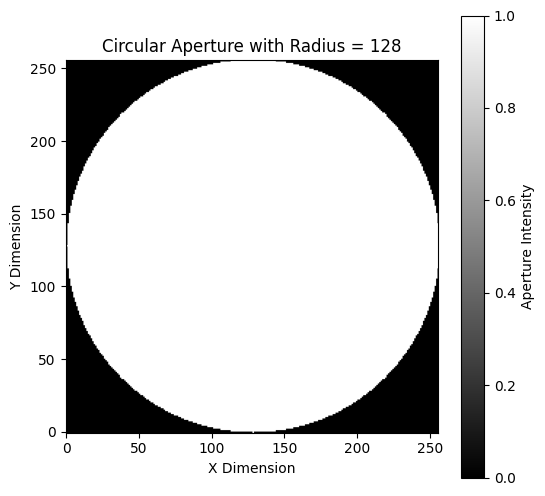

In [5]:
# Plot the aperture
plt.figure(figsize=(6, 6))
plt.imshow(circ_A, cmap='gray', origin='lower')
plt.colorbar(label="Aperture Intensity")
plt.title(f"Circular Aperture with Radius = {r}")
plt.xlabel("X Dimension")
plt.ylabel("Y Dimension")
plt.show()

To calculate the PSF, we must use:

$$PSF = |\mathcal{F}(A(x,y))|^2$$

which means we must perform a 2-dimensional Fourier transform on the aperture. Recall also that the PSF must be normalized.

In [6]:
#import packages from scipy to perform 2D Fourier transform
from scipy.fftpack import fftshift, fft2

In [19]:
#function to compute the PSF
def get_psf(A):
    """INPUT
    A = the aperture
    
    OUTPUT
    PSF = point spread function
    """
    
    ft_A = fftshift(fft2(A))  #Fourier Transform on A
    psf = np.real(ft_A) ** 2 + np.imag(ft_A) ** 2
    psf /= np.max(psf)  #normalize PSF to range [0, 1]
    return psf

Now we can compute the PSF for a number of different circular aperture radii. We illustrate the differences between the PSF of different size apertures in the figure below.

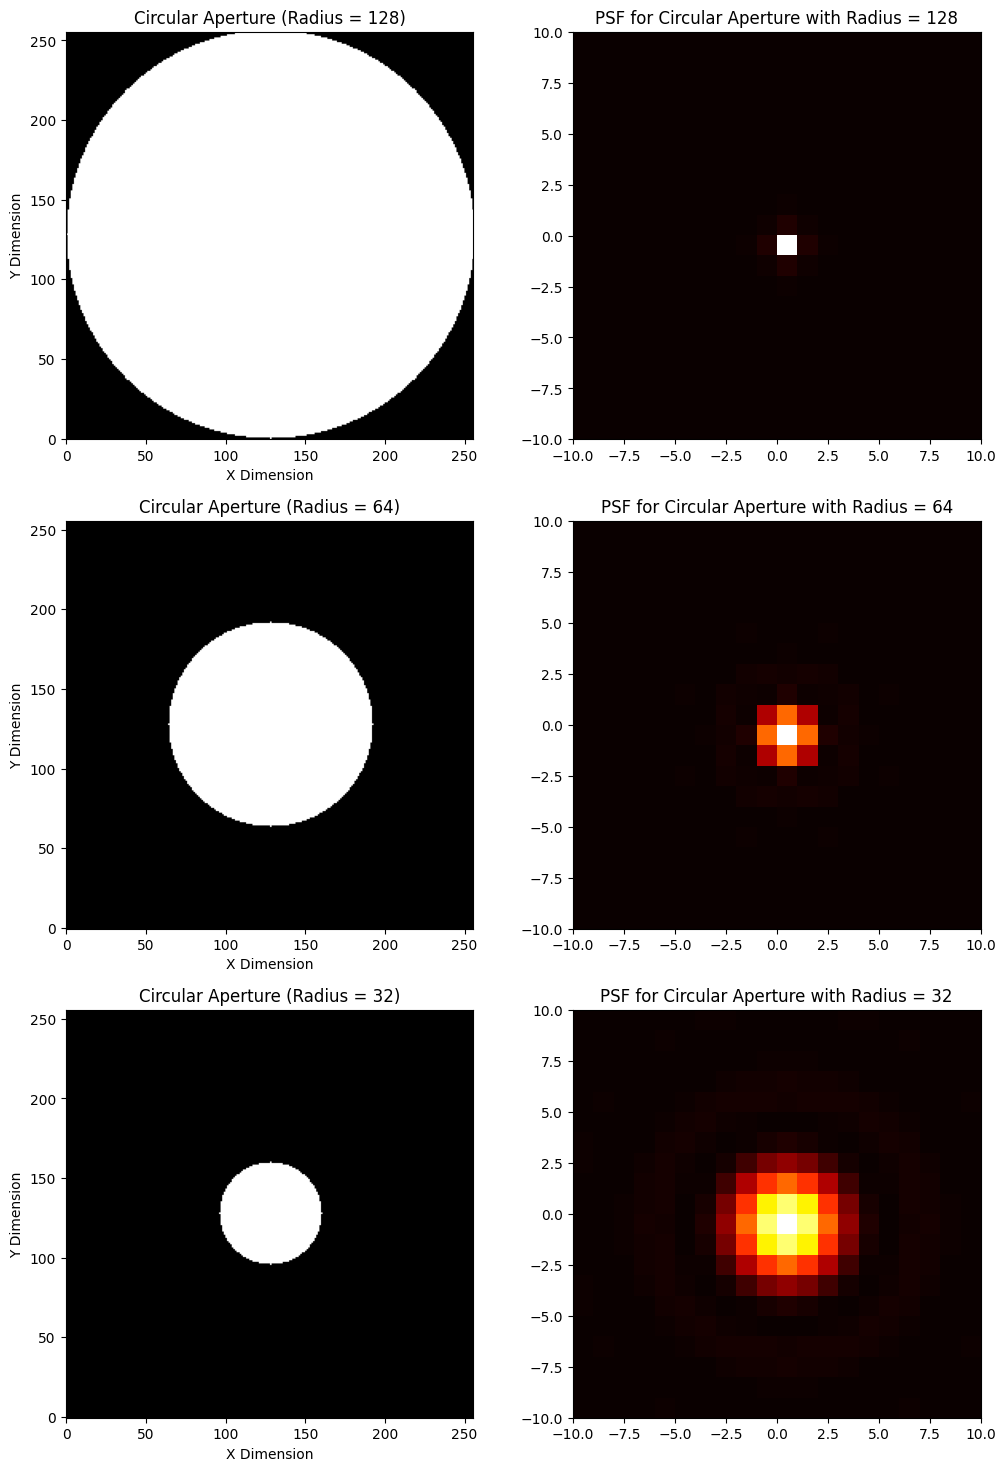

In [20]:
radii = [128, 64, 32]

fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Define limits for zooming in on the PSF center
zoom_range = 10
x_min, x_max = -zoom_range, zoom_range
y_min, y_max = -zoom_range, zoom_range

for i, r in enumerate(radii):
    circ_A=circular_A(field_size, r)

    #plot aperture
    axs[i, 0].imshow(circ_A, cmap='gray', origin='lower')
    axs[i, 0].set_title(f"Circular Aperture (Radius = {r})")
    axs[i, 0].set_xlabel("X Dimension")
    axs[i, 0].set_ylabel("Y Dimension")
    #axs[i, 0].set_colorbar(label="Aperture Intensity")


    #compute the PSF
    psf = get_psf(circ_A)

    #plot the PSF
    axs[i, 1].imshow(psf, cmap='hot', extent=(-field_size // 2, field_size // 2, -field_size // 2, field_size // 2))
    axs[i, 1].set_title(f"PSF for Circular Aperture with Radius = {r}")
    axs[i, 1].set_xlim(x_min, x_max)
    axs[i, 1].set_ylim(y_min, y_max)
    #axs[i, 1].set_colorbar()



**Task 1a:** Explore how the PSF would appear in the case of other telescope mirror shapes (e.g. square, hexagonal).

Consider for example a square shape which interior satisfies:
$$|x-x_0|\le\dfrac{\mathrm{side~length}}{2}~\mathrm{and}~|y-y_0|\le\dfrac{\mathrm{side~length}}{2}$$

where `side_length` is the length of one side of the square.

In [21]:
#function to simulate a square aperture

def square_A(field_size, side_length):
    '''INPUTS
    field_size = size of the field
    side_length = length of side of square mirror
    
    OUTPUTS
    square aperture
    '''
    y, x = np.indices((field_size, field_size))
    field_center = field_size//2
    sq_A = ((np.abs(x - field_center) <= side_length / 2) & (np.abs(y - field_center) <= side_length / 2)).astype(float)
    return sq_A    

We can now visualise the PSF for square apertures of different `side_length` values.

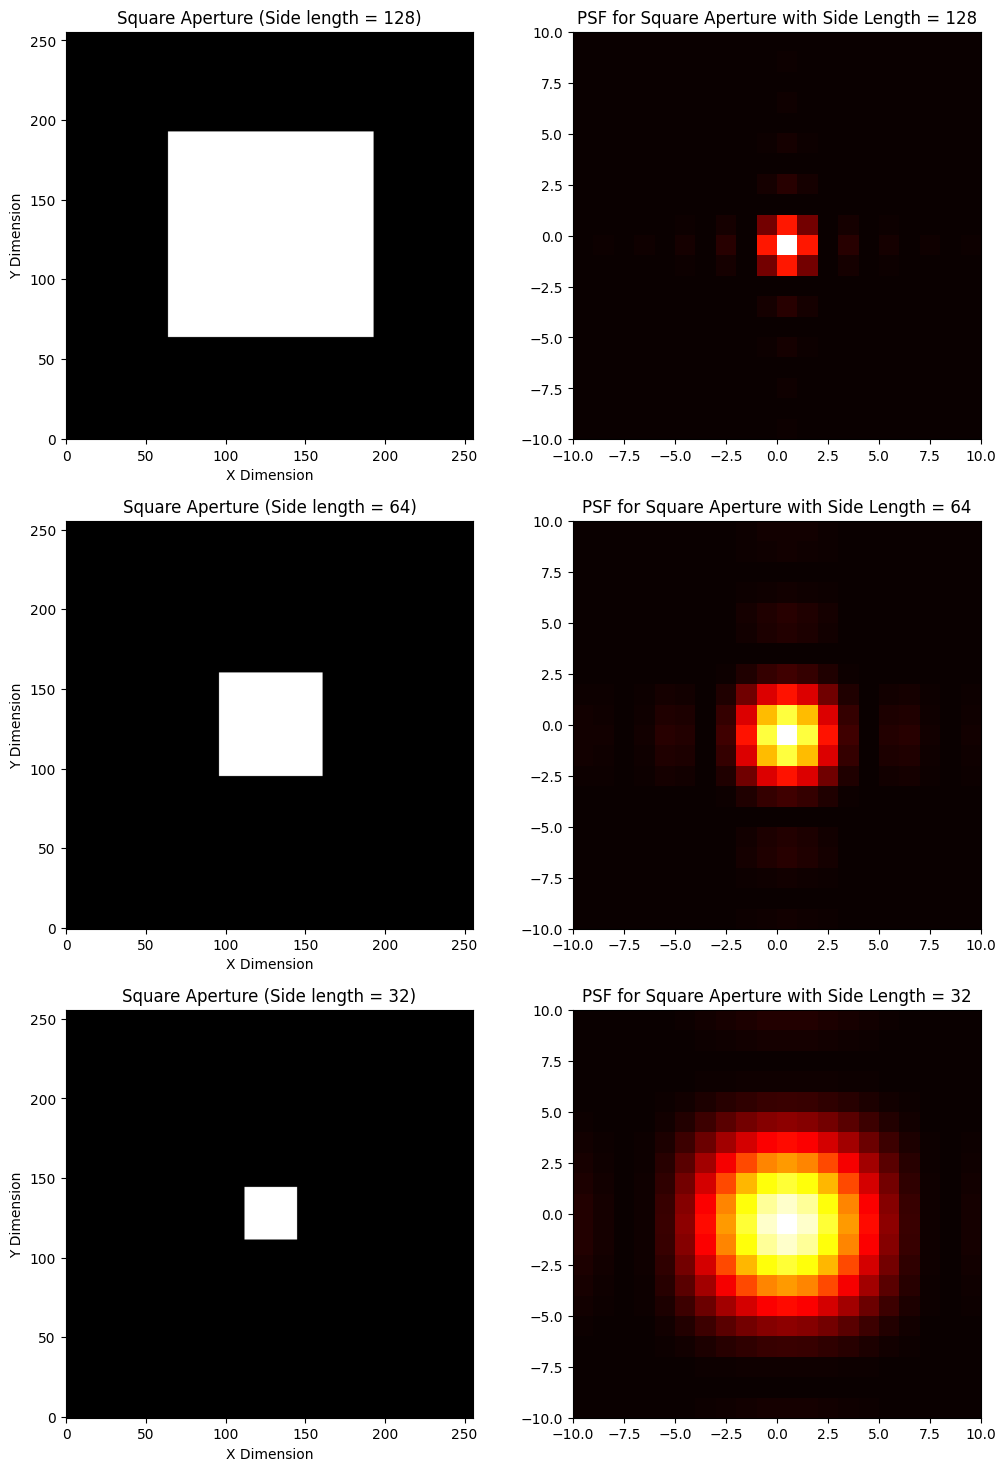

In [22]:
#visualize our aperture through a plot
side_lengths = [128, 64, 32]

fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Define limits for zooming in on the PSF center
zoom_range = 10
x_min, x_max = -zoom_range, zoom_range
y_min, y_max = -zoom_range, zoom_range

for i, s_l in enumerate(side_lengths):
    sq_A = square_A(field_size, s_l)

    #plot aperture
    axs[i, 0].imshow(sq_A, cmap='gray', origin='lower')
    axs[i, 0].set_title(f"Square Aperture (Side length = {s_l})")
    axs[i, 0].set_xlabel("X Dimension")
    axs[i, 0].set_ylabel("Y Dimension")
    #axs[i, 0].set_colorbar(label="Aperture Intensity")


    #compute the PSF
    psf_sq = get_psf(sq_A)

    #plot the PSF
    axs[i, 1].imshow(psf_sq, cmap='hot', extent=(-field_size // 2, field_size // 2, -field_size // 2, field_size // 2))
    axs[i, 1].set_title(f"PSF for Square Aperture with Side Length = {s_l}")
    axs[i, 1].set_xlim(x_min, x_max)
    axs[i, 1].set_ylim(y_min, y_max)
    #axs[i, 1].set_colorbar()

Consider now a hexagonal shape, whose interior satisfies the following constraints with respect to the circumradius $R$:

* Horizontal bounds: $|x|\le R$
* Diagonal bounds (top-left to bottom-right): $|\sqrt{3}y+x|\le\sqrt{3} R$
* Diagonal bounds (top-right to bottom-left): $|\sqrt{3}y+x|\le\sqrt{3} R$

In [23]:
#simulating a hexagonal aperture

def hexagon_A(grid_size, radius):
    '''INPUTS
    field_size = size of the field
    radius = circumradius of the hexagonal aperture
    
    OUTPUTS
    hexagonal aperture
    '''
    
    # Define grid and center
    y, x = np.indices((grid_size, grid_size))
    field_center = grid_size // 2
    x, y = x - field_center, y - field_center  # Shift to be centered around (0,0)
    
    # Define hexagonal aperture
    A = (
        (np.abs(x) <= radius) &  # Horizontal bounds
        (np.abs(np.sqrt(3) * y + x) <= radius * np.sqrt(3)) &  # Diagonal bounds (top-left to bottom-right)
        (np.abs(np.sqrt(3) * y - x) <= radius * np.sqrt(3))    # Diagonal bounds (top-right to bottom-left)
    ).astype(float)
    
    return A

Let us also demonstrate the effects of varying the circumradius $R$ on the resulting PSF.

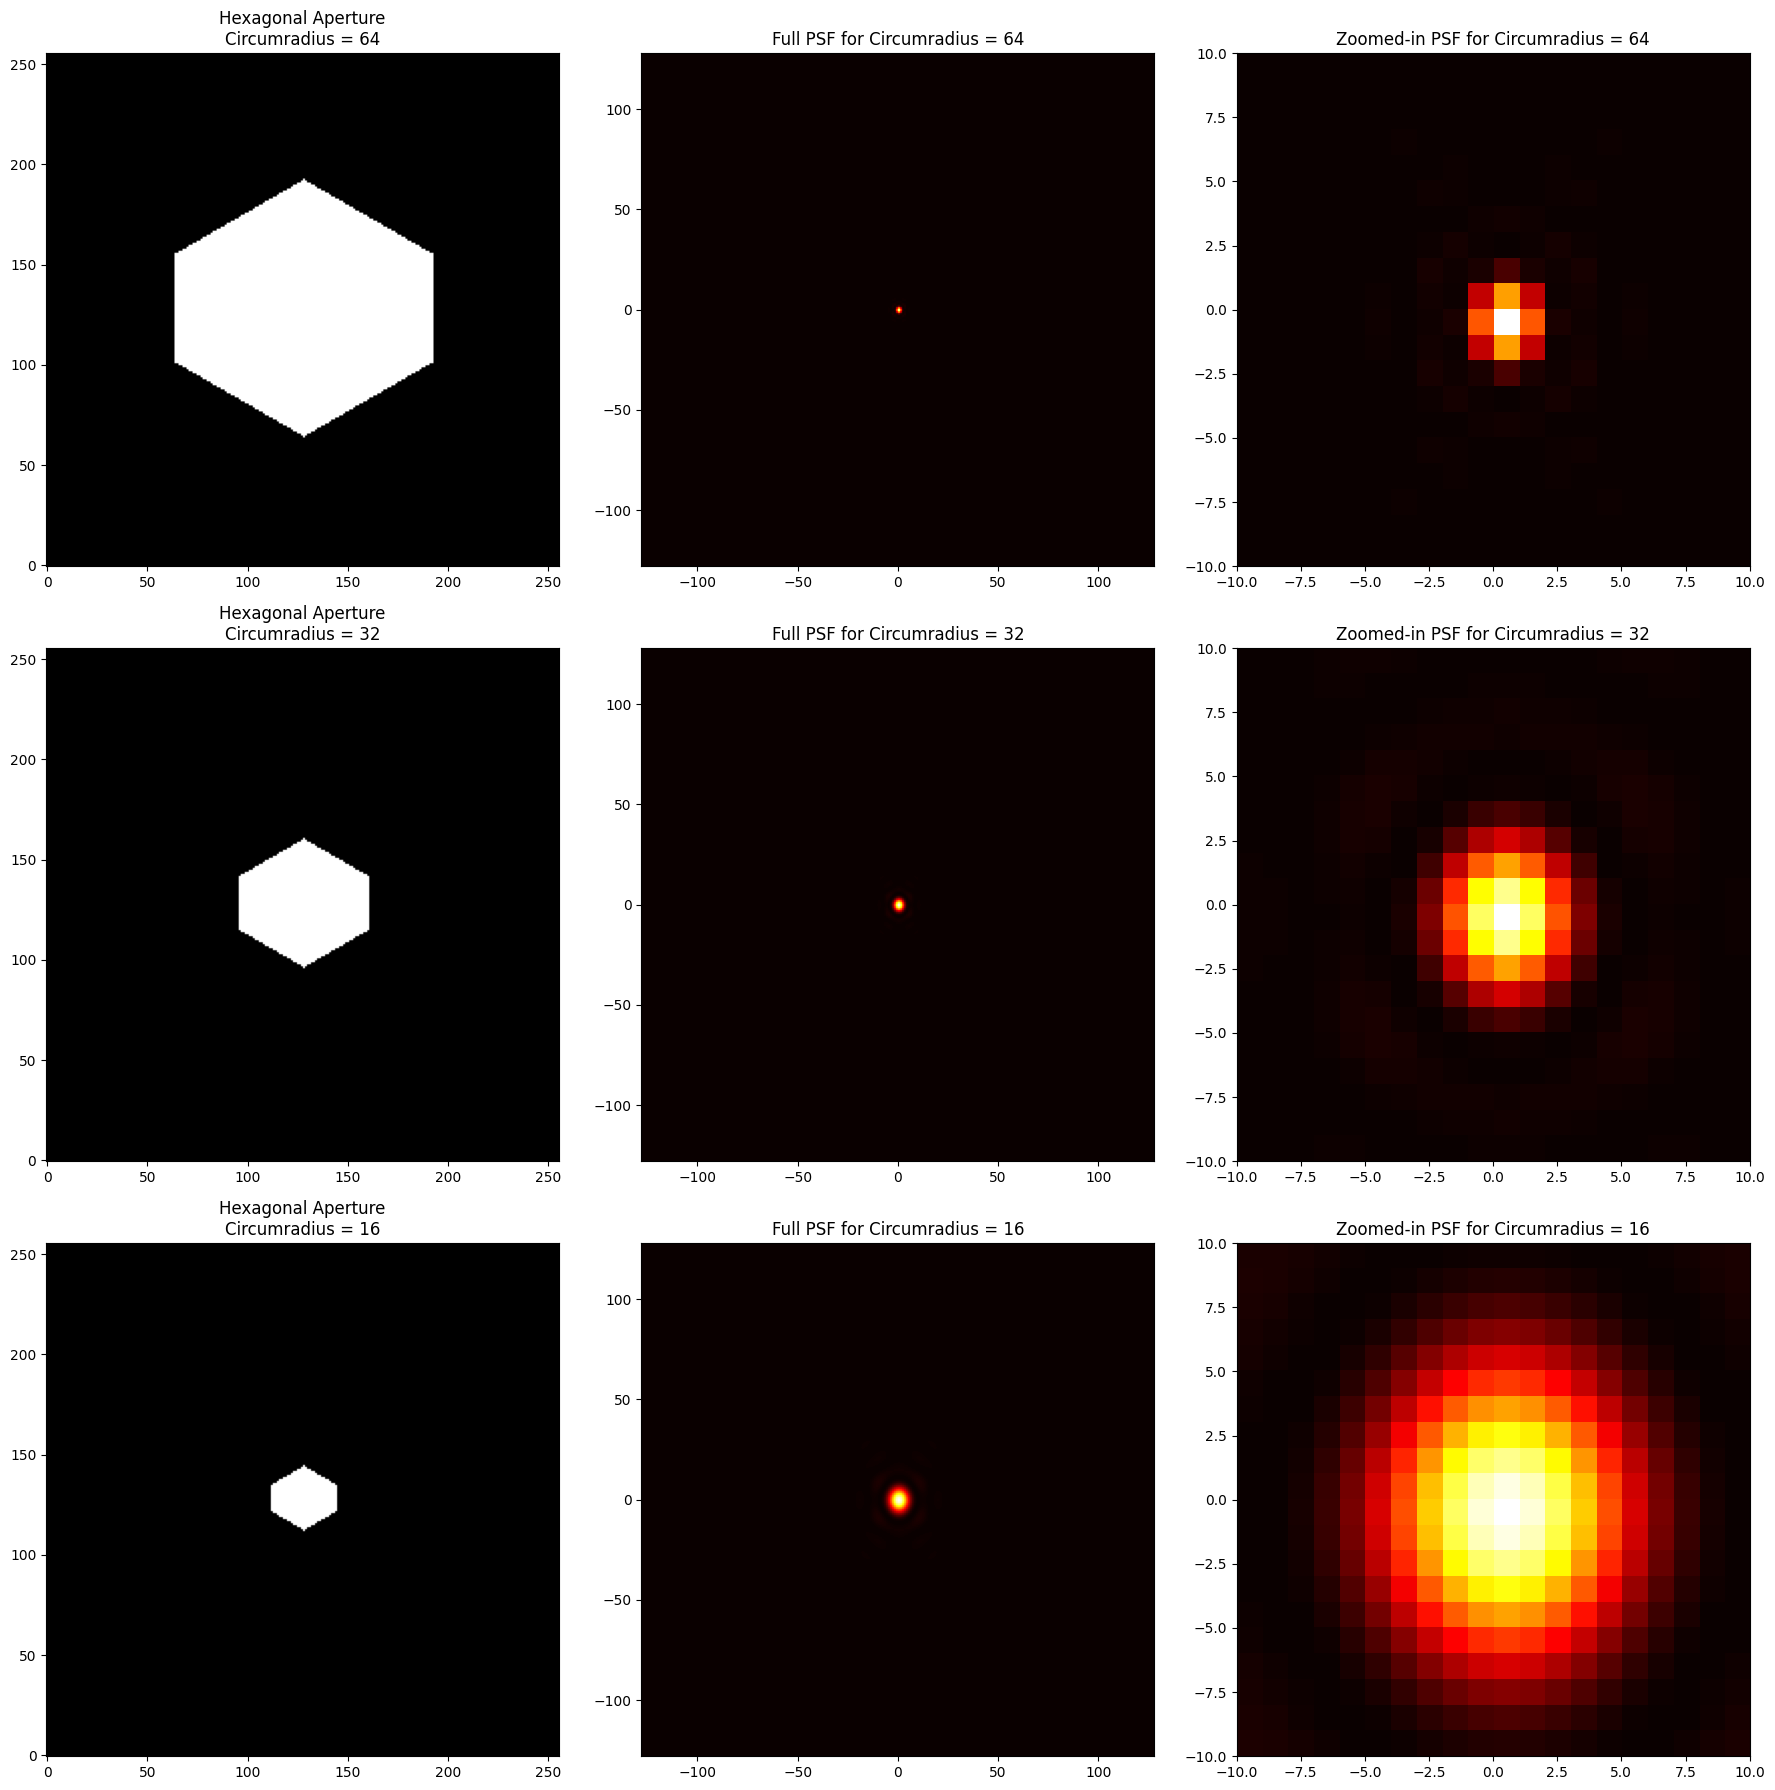

In [24]:
#demonstrate with different radii

#visualize our aperture through a plot
radii = [64, 32, 16]

# Zoom range around the center for the zoomed-in PSF
zoom_range = 10

# Set up a 3x3 grid for plotting
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

for i, r in enumerate(radii):
    # Create hexagonal aperture
    hex_A = hexagon_A(field_size, r)

    # Compute the PSF for the hexagonal aperture
    psf_hex = get_psf(hex_A)

    # Define the limits for zooming in around the center for the PSF
    center = field_size // 2
    x_min, x_max = center - zoom_range, center + zoom_range
    y_min, y_max = center - zoom_range, center + zoom_range

    # Plot the hexagonal aperture
    axs[i, 0].imshow(hex_A, cmap='gray', origin='lower')
    axs[i, 0].set_title(f"Hexagonal Aperture\nCircumradius = {r}")

    # Plot the full PSF
    axs[i, 1].imshow(psf_hex, cmap='hot', extent=(-field_size // 2, field_size // 2, -field_size // 2, field_size // 2))
    axs[i, 1].set_title(f"Full PSF for Circumradius = {r}")

    # Plot the zoomed-in PSF
    axs[i, 2].imshow(psf_hex, cmap='hot', extent=(-field_size // 2, field_size // 2, -field_size // 2, field_size // 2))
    axs[i, 2].set_xlim(x_min - center, x_max - center)
    axs[i, 2].set_ylim(y_min - center, y_max - center)
    axs[i, 2].set_title(f"Zoomed-in PSF for Circumradius = {r}")

# Adjust layout to ensure titles and labels fit
plt.tight_layout()
plt.show()

## Image Formation

Let’s now consider how the the source image is forming, especially in case of extended sources. Since the radiation detectors have discrete sampling systems, we can assume that the object is composed of many point sources of radiation, each of which forms an image as a PSF. According to the superposition principle, the resulting image is the sum of the PSF values at given detector points for each individual source. This mathematical operation is essentially a convolution of the object and the telescope's PSF (see Figure 3). In this case, the PSF should be considered as a weighting function, meaning it must be normalized, and for that reason, we can also refer to it as a sort of distribution.

Thus, the image we will see in the telescope’s focus depends on the PSF of our telescope, i.e., on the telescope's aperture and its size.

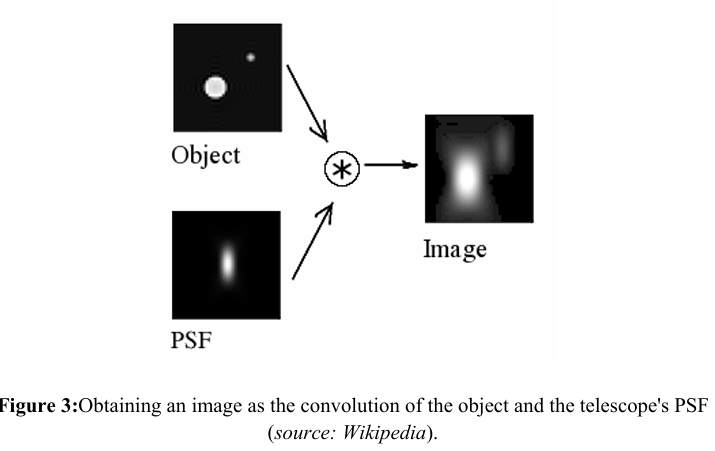

**Task 2:** Produce the image of any ideal source (e.g. model of an ideal star or galaxy) seen through the circular aperture (e.g. one of those created within the previous task). 

Let us model the source as a point at some position in the field (assuming it is completely isolated), and then simulate the image by convolving the source with the PSF using `convolve2d` from `scipy`.

In [25]:
from scipy.signal import convolve2d

In [26]:
#function to create field with the point source

def point_source(field_size, pos_x, pos_y):
    '''INPUTS
    field_size = size of the field
    pos_x, pos_y = (x,y) coordinates of the source, 2-dimensional input

    OUTPUTS
    field including point source
    '''
    
    source = np.zeros((field_size, field_size))
    source[pos_x, pos_y] = 1
    return source

In [27]:
print(field_center)

#position our ideal source at the center of the field

p_source = point_source(field_size, field_center, field_center)

128


In [28]:
#function to convolve the point source with the PSF to simulate the image

def get_image(source, psf):
    return convolve2d(source, psf, mode='same')

Let us use the smallest circular aperture from above with radius = 32.

In [29]:
r = 32

circ_A=circular_A(field_size, r)

#compute the PSF
psf = get_psf(circ_A)

#compute the image
image = get_image(p_source, psf)

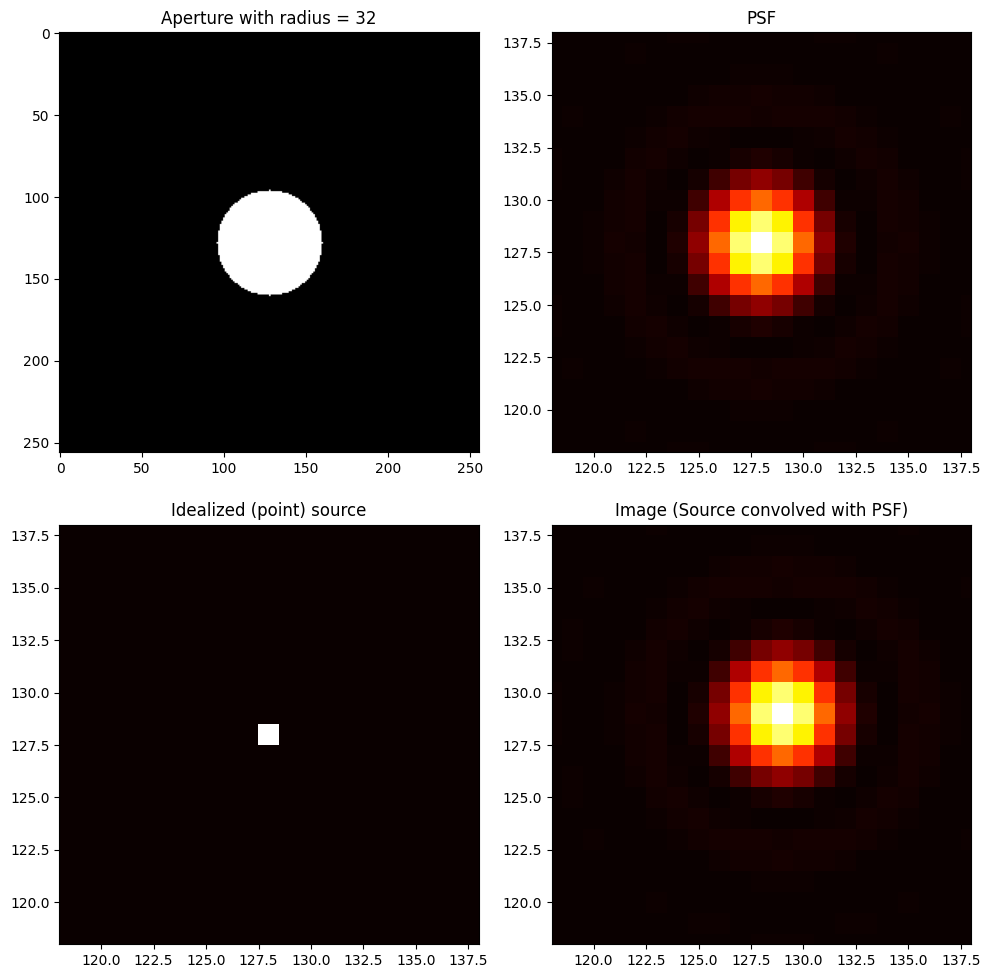

In [31]:
#plot to visualise our results
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

#define limits for zooming in around the center
zoom_range = 10
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# Figure 1: Aperture
axs[0, 0].imshow(circ_A, cmap='gray')
axs[0, 0].set_title("Aperture with radius = "+str(r))

# Figure 2: PSF
axs[0, 1].imshow(psf, cmap='hot')
axs[0, 1].set_title("PSF")
#axs[0, 1].axis('off')
axs[0, 1].set_xlim(x_min, x_max)
axs[0, 1].set_ylim(y_min, y_max)

# Figure 3: Source
axs[1, 0].imshow(p_source, cmap='hot')
axs[1, 0].set_title("Idealized (point) source")
#axs[1, 0].axis('off')
axs[1, 0].set_xlim(x_min, x_max)
axs[1, 0].set_ylim(y_min, y_max)

# Figure 4: Image (Convolution of Source and PSF)
axs[1, 1].imshow(image, cmap='hot')
axs[1, 1].set_title("Image (Source convolved with PSF)")
#axs[1, 1].axis('off')
axs[1, 1].set_xlim(x_min, x_max)
axs[1, 1].set_ylim(y_min, y_max)

# Display all figures
plt.tight_layout()
plt.show()

Let us try this again, this time using an extended source, which we can model as a circle.

In [32]:
#function to create extended source shaped like a circle
def extended_source(field_size, radius, pos_x, pos_y):
    '''INPUTS
    field_size = size of the field
    radius = radius of the circular source
    pos_x, pos_y = (x,y) coordinates of the center of the source

    OUTPUTS
    field including extended source
    '''
    
    y, x = np.indices((field_size, field_size))
    distance_from_center = np.sqrt((x - pos_x) ** 2 + (y - pos_y) ** 2)

    source = np.where(distance_from_center <= radius, 1.0, 0.0)
    return source

In [33]:
size = 5
ext_source = extended_source(field_size, size, field_center, field_center)

#compute the image using same (circular aperture with r=32) PSF
ext_image = get_image(ext_source, psf)

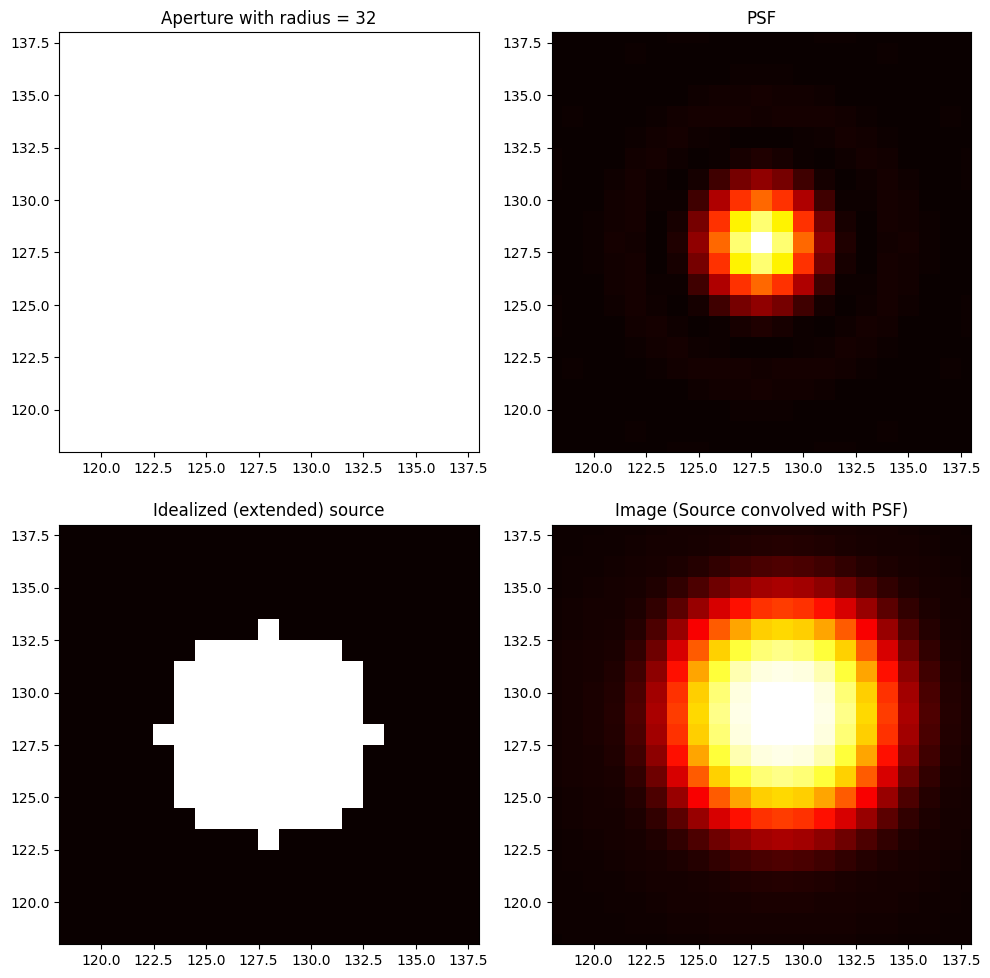

In [34]:
#plot to visualise our results
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

#define limits for zooming in around the center
zoom_range = 10
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# Figure 1: Aperture
axs[0, 0].imshow(circ_A, cmap='gray')
axs[0, 0].set_title("Aperture with radius = "+str(r))
#axs[0, 0].axis('off')
axs[0, 0].set_xlim(x_min, x_max)
axs[0, 0].set_ylim(y_min, y_max)

# Figure 2: PSF
axs[0, 1].imshow(psf, cmap='hot')
axs[0, 1].set_title("PSF")
#axs[0, 1].axis('off')
axs[0, 1].set_xlim(x_min, x_max)
axs[0, 1].set_ylim(y_min, y_max)

# Figure 3: Source
axs[1, 0].imshow(ext_source, cmap='hot')
axs[1, 0].set_title("Idealized (extended) source")
#axs[1, 0].axis('off')
axs[1, 0].set_xlim(x_min, x_max)
axs[1, 0].set_ylim(y_min, y_max)

# Figure 4: Image (Convolution of Source and PSF)
axs[1, 1].imshow(ext_image, cmap='hot')
axs[1, 1].set_title("Image (Source convolved with PSF)")
#axs[1, 1].axis('off')
axs[1, 1].set_xlim(x_min, x_max)
axs[1, 1].set_ylim(y_min, y_max)

# Display all figures
plt.tight_layout()
plt.show()

# Wavefront Perturbations and Zernike Polynomials

So far, we have only considered a flat wavefront passing through an ideal optical system. 
However, this is not what happens in reality. The wavefront is first affected by the atmosphere (turbulence), and then by the imperfections of the optical elements, which lead to aberrations, coma, astigmatism, defocusing, and other effects. Since these changes only affect the phase of the wave, their impact on the PSF is reflected in the following way:

$$PSF = |F(A(x,y)\exp{i\Phi(x,y)}|^2$$

where $\Phi(x,y)$ is the function that describes phase changes of the wavefront at the point (x,y) of the telescope aperture. This phase change functions can be represented by Zernike polynomials, which are defined on a circular aperture of radius 1 and are orthogonal to each other:

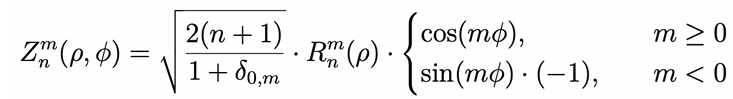

where $n$ and $m$ represent the order of the Zernike polynomial (radial and azimuthal, 
respectively), and $\rho$ and $\phi$ are usual cylindrical coordinates. From their definition, it can be seen that in Zernike polynomials, the radial and azimuthal parts of the polynomial are separated. The first term in the polynomial is a normalization factor, derived from the normalization condition of the polynomial: 

$$\int^{2\pi}_0\int^1_0 Z^m_n(\rho,\phi) \mathrm{d}\rho \mathrm{d}\phi = \pi$$

Different causes of wavefront perturbations are described by different Zernike polynomials. These polynomials are obtained from the series expansion of the wavefront on a circular aperture, where in the zeroth order we have $Z_0^0(\rho,\phi)=1$. Examples of polynomials for some of the wavefront perturbations due to different abberations are given in Table 1. The function $\Phi$ in the main equation represents the linear combination of the polynomials corresponding to 
all present wavefront perturbations. The visualization of different polynomials and their combinations can be examine at https://webs.optics.arizona.edu/gsmith/Zernike.html and 
https://wp.optics.arizona.edu/jcwyant/miscellaneous/neat-graphics/zernike-polynomials/.

### Defocusing

**Task 3:** Examine how defocusing the optical system will affect the resulting image. Compare the obtained image with the image for a focused system.

For defocusing, use the first Zernike polynomial from Table 1:
$$Z^0_2 = \sqrt{3}\left(2\rho^2-1\right)$$
where $\rho$ is the normalized radial coordinate defined as: $\rho = r/R$, where $r$ is the distance from the center (in the aperture), and $R$ is the radius of the aperture.

We now need to compute a new PSF which also accounts for defocusing using:

$$PSF = |F(A(x,y)\exp{i\Phi(x,y)}|^2$$

In [35]:
#define function to apply defocusing Zernike polynomial

def defocused_psf(aperture, defocusing_strength):
    '''INPUTS
    aperture
    defocusing_strength = strength of the defocusing

    OUTPUT
    PSF of aperture which takes into account defocusing
    '''
    grid_size = aperture.shape[0]
    #recreate grid from aperture
    y, x = np.indices((grid_size, grid_size))
    
    center = grid_size // 2
    r = np.sqrt((x - center) ** 2 + (y - center) ** 2)
    R = center #Radius of the aperture
    
    #compute the normalized radius rho
    rho = r / R
    
    phase = defocusing_strength * np.sqrt(3) * (2 * rho** 2 -1) #zernike polynomial
    defocused_aperture = aperture * np.exp(1j * phase)  # Apply phase shift

    ft_A = fftshift(fft2(defocused_aperture))
    psf_defocused = np.real(ft_A) ** 2 + np.imag(ft_A) ** 2
    
    psf_defocused /= np.max(psf_defocused) #normalizing PSF
    return psf_defocused

Using the same image as before, containing an extended source, let us compute the defocused PSF.

In [36]:
#set defocusing strength
def_strength = 40

defoc_psf = defocused_psf(circ_A, def_strength)

#compute the image using same (circular aperture with r=32) PSF
def_image = get_image(ext_source, defoc_psf)

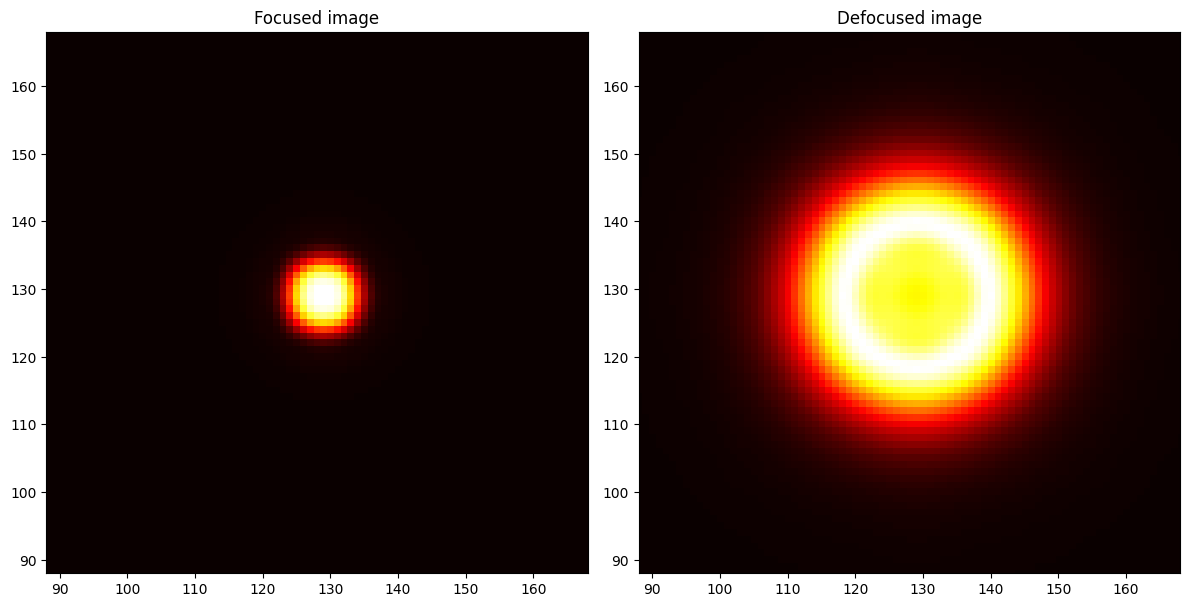

In [37]:
#illustrate focused and defocused images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Define limits for zooming in around the center (if necessary)
zoom_range = 40
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# plot extended image from before
axs[0].imshow(ext_image, cmap='hot')
axs[0].set_title("Focused image")
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)

# plot defocused image
axs[1].imshow(def_image, cmap='hot')
axs[1].set_title("Defocused image")
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

Let us compare with the results using a smaller defocusing strength:

In [38]:
#set defocusing strength
def_strength = 10

defoc_psf = defocused_psf(circ_A, def_strength)

#compute the image using same (circular aperture with r=32) PSF
def_image = get_image(ext_source, defoc_psf)

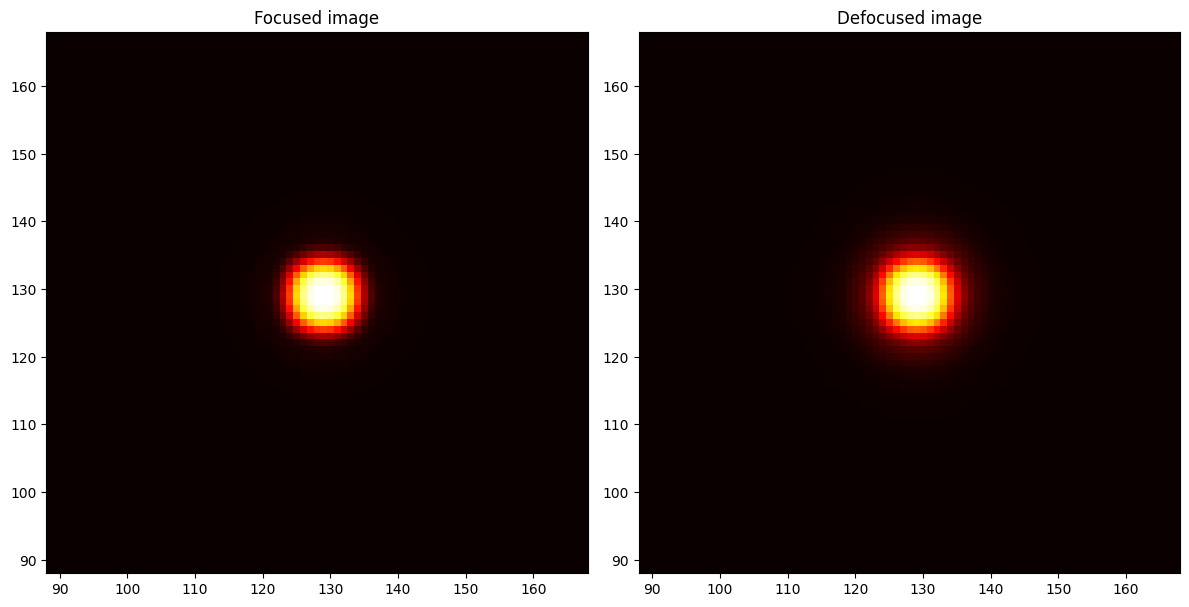

In [39]:
#illustrate focused and defocused images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Define limits for zooming in around the center (if necessary)
zoom_range = 40
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# plot extended image from before
axs[0].imshow(ext_image, cmap='hot')
axs[0].set_title("Focused image")
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)

# plot defocused image
axs[1].imshow(def_image, cmap='hot')
axs[1].set_title("Defocused image")
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

Depending on the strength of the defocusing, the effect is less or more prominent, although still noticably present in both cases.

**Task 4:** Consider other influences of wavefront deformation (spherical aberration, coma) on image formation. Try to create a linear combination and see how it affects the image.

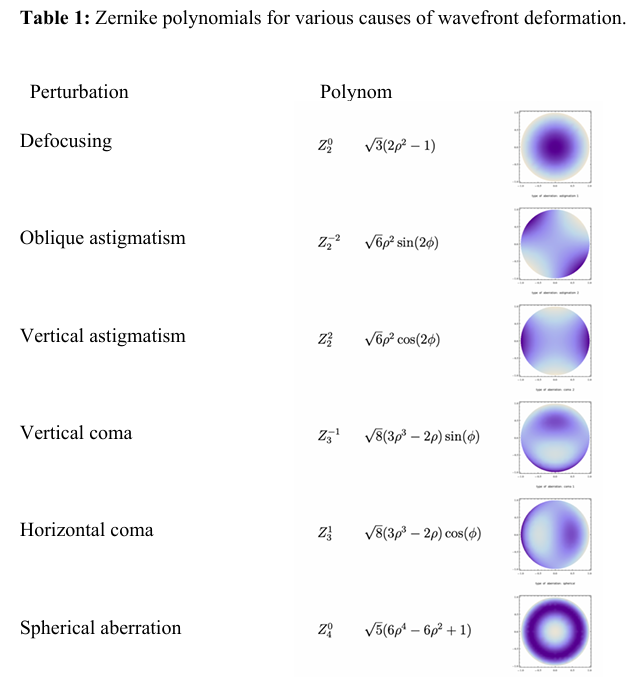

In order to apply any of these Zernike polynomials, we can define a singular function to compute the full PSF which takes into account all types of distortions.

In [40]:
#define function to apply Zernike polynomials to the PSF

def full_effect_psf(aperture, defocus=0, ob_astig=0, vert_astig=0, vert_coma=0, hor_coma=0, sph_aberr=0):
    '''INPUTS
    aperture
    defocus = strength of the defocusing (0 if none)
    ob_astig = strength of oblique astigmatism (0 if none)
    vert_astig = strength of vertical astigmatism (0 if none)
    vert_coma = strength of vertical coma (0 if none)
    hor_coma = strength of horizontal coma (0 if none)
    sph_aberr = strength of spherical aberration (0 if none)

    OUTPUT
    PSF of aperture which takes into account the zernike polynomials of the specified effects
    '''
    
    grid_size = aperture.shape[0]
    #recreate grid from aperture
    y, x = np.indices((grid_size, grid_size))
    
    center = grid_size // 2
    r = np.sqrt((x - center) ** 2 + (y - center) ** 2)
    R = center #Radius of the aperture
    
    #compute the normalized radius rho
    rho = r / R

    #find phi
    phi = np.arctan2(y-center, x-center)

    # Initialize the phase with zeros (as a complex number)
    total_phase = np.zeros_like(aperture, dtype=complex)

    #defocusing
    phase_defocus = defocus * np.sqrt(3) * (2 * rho** 2 -1) #zernike polynomial
    total_phase += phase_defocus

    #vertical astigmatism
    phase_ob_astig = ob_astig * np.sqrt(6) * rho**2 * np.sin(2*phi) #zernike polynomial
    total_phase += phase_ob_astig

    #vertical astigmatism
    phase_vert_astig = vert_astig * np.sqrt(6) * rho**2 * np.cos(2*phi) #zernike polynomial
    total_phase += phase_vert_astig

    #vertical coma
    phase_vert_coma = vert_coma * np.sqrt(8) * (3*rho**3 - 2*rho) * np.sin(phi) #zernike polynomial
    total_phase += phase_vert_coma

    #horizontal coma
    phase_hor_coma = hor_coma * np.sqrt(8) * (3 * rho** 3 - 2*rho) * np.cos(phi) #zernike polynomial
    total_phase += phase_hor_coma

    #spherical aberration
    phase_sph_aberr = sph_aberr * np.sqrt(5) * (6 * rho**4 - 6 * rho**2 + 1) #zernike polynomial
    total_phase += phase_sph_aberr
    
    defocused_aperture = aperture * np.exp(1j * total_phase)  # Apply phase shift

    ft_A = fftshift(fft2(defocused_aperture))
    psf_defocused = np.real(ft_A) ** 2 + np.imag(ft_A) ** 2
    psf_defocused /= np.max(psf_defocused) #normalizing PSF
    return psf_defocused

Now, we can illustrate the effect of each different type of distortion.

### Oblique astigmatism

In [43]:
affected_psf = full_effect_psf(circ_A, ob_astig=40)

#compute the image using same (circular aperture with r=32) PSF
def_image = get_image(ext_source, affected_psf)

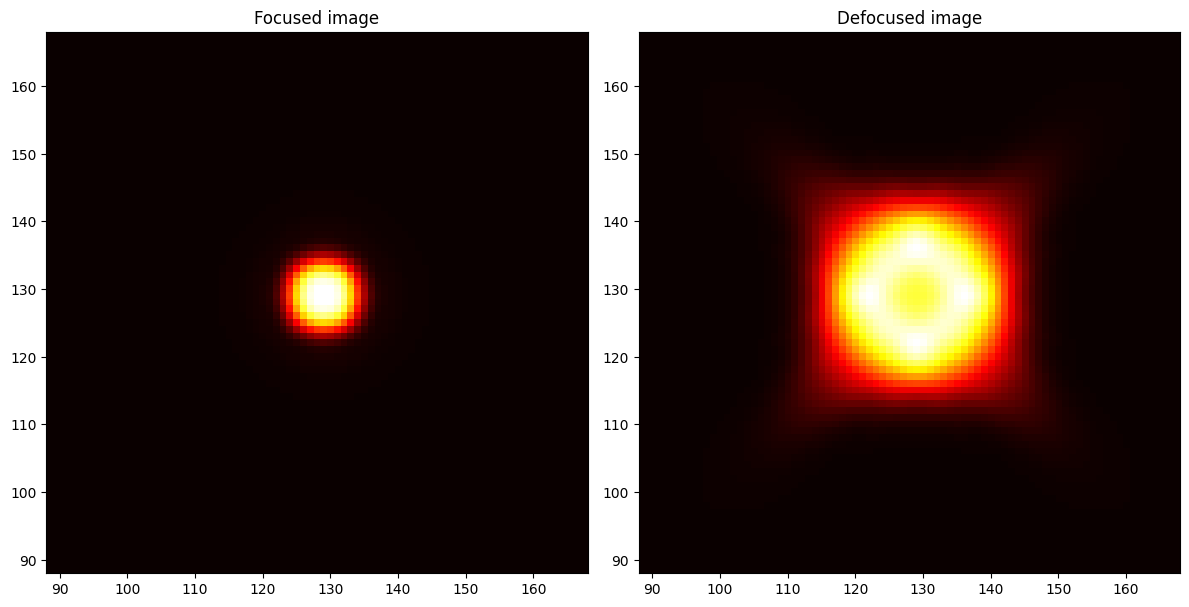

In [44]:
#illustrate focused and defocused images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Define limits for zooming in around the center (if necessary)
zoom_range = 40
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# plot extended image from before
axs[0].imshow(ext_image, cmap='hot')
axs[0].set_title("Focused image")
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)

# plot defocused image
axs[1].imshow(def_image, cmap='hot')
axs[1].set_title("Defocused image")
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

### Vertical astigmatism

In [45]:
affected_psf = full_effect_psf(circ_A, vert_astig=40)

#compute the image using same (circular aperture with r=32) PSF
def_image = get_image(ext_source, affected_psf)

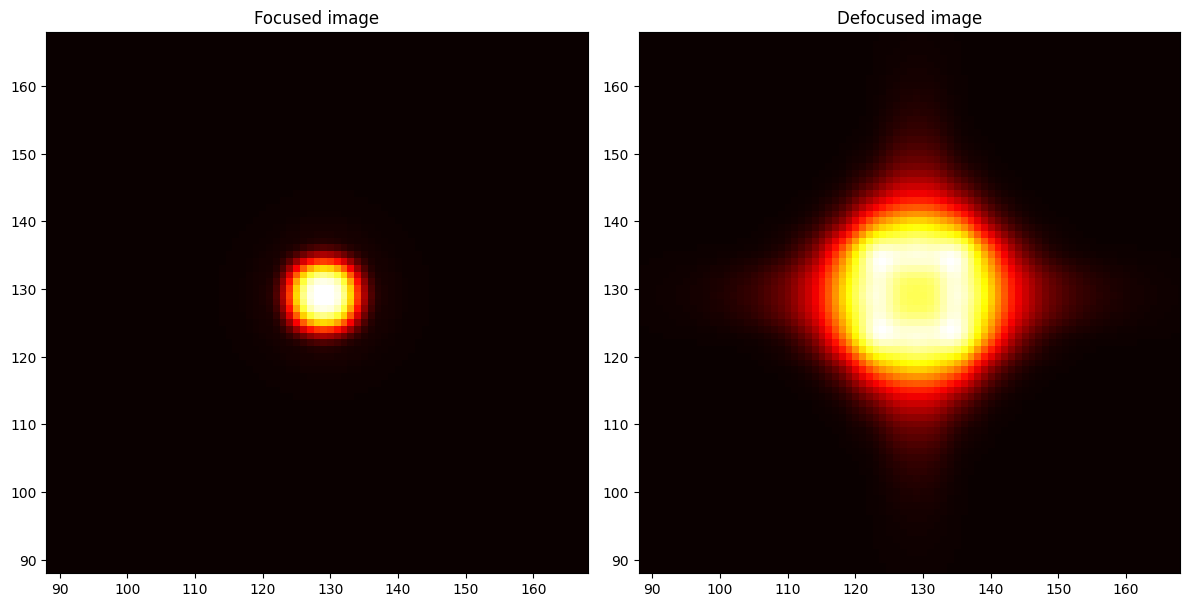

In [46]:
#illustrate focused and defocused images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Define limits for zooming in around the center (if necessary)
zoom_range = 40
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# plot extended image from before
axs[0].imshow(ext_image, cmap='hot')
axs[0].set_title("Focused image")
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)

# plot defocused image
axs[1].imshow(def_image, cmap='hot')
axs[1].set_title("Defocused image")
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

### Vertical Coma

In [47]:
affected_psf = full_effect_psf(circ_A, vert_coma=10)

#compute the image using same (circular aperture with r=32) PSF
def_image = get_image(ext_source, affected_psf)

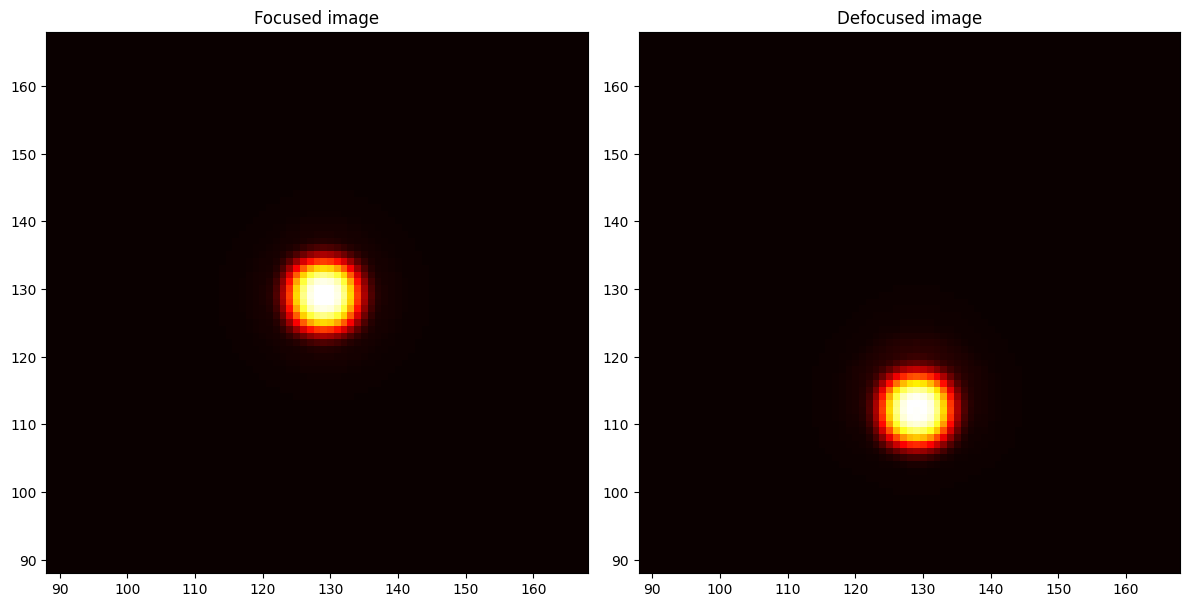

In [48]:
#illustrate focused and defocused images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Define limits for zooming in around the center (if necessary)
zoom_range = 40
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# plot extended image from before
axs[0].imshow(ext_image, cmap='hot')
axs[0].set_title("Focused image")
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)

# plot defocused image
axs[1].imshow(def_image, cmap='hot')
axs[1].set_title("Defocused image")
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

### Horizontal Coma

In [49]:
affected_psf = full_effect_psf(circ_A, hor_coma=10)

#compute the image using same (circular aperture with r=32) PSF
def_image = get_image(ext_source, affected_psf)

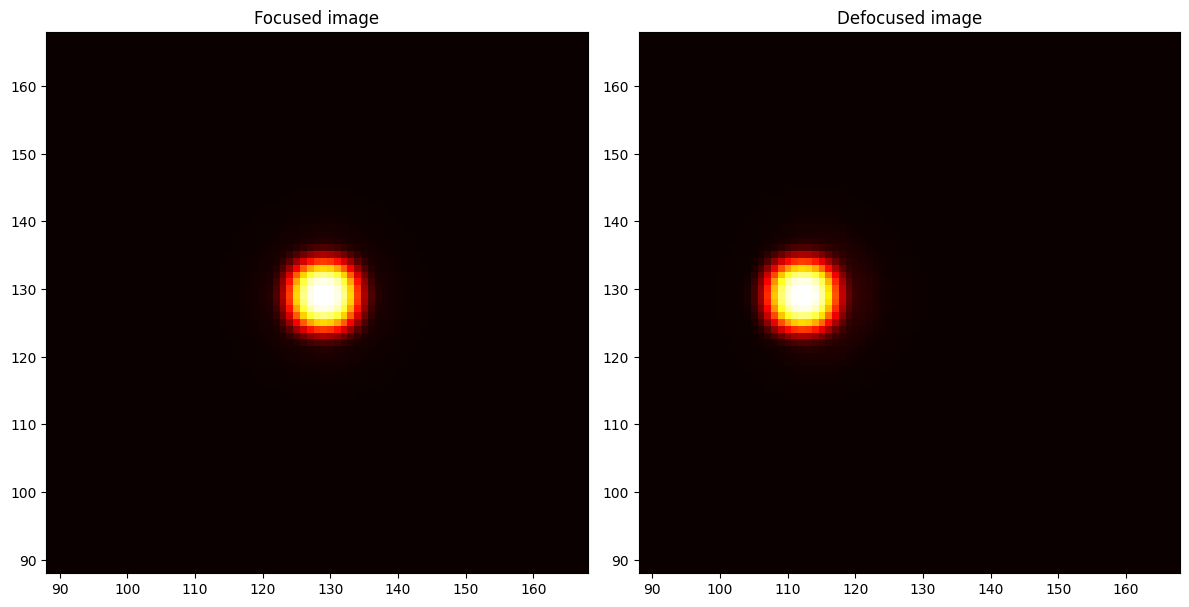

In [50]:
#illustrate focused and defocused images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Define limits for zooming in around the center (if necessary)
zoom_range = 40
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# plot extended image from before
axs[0].imshow(ext_image, cmap='hot')
axs[0].set_title("Focused image")
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)

# plot defocused image
axs[1].imshow(def_image, cmap='hot')
axs[1].set_title("Defocused image")
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

### Spherical aberration

In [51]:
affected_psf = full_effect_psf(circ_A, sph_aberr=20)

#compute the image using same (circular aperture with r=32) PSF
def_image = get_image(ext_source, affected_psf)

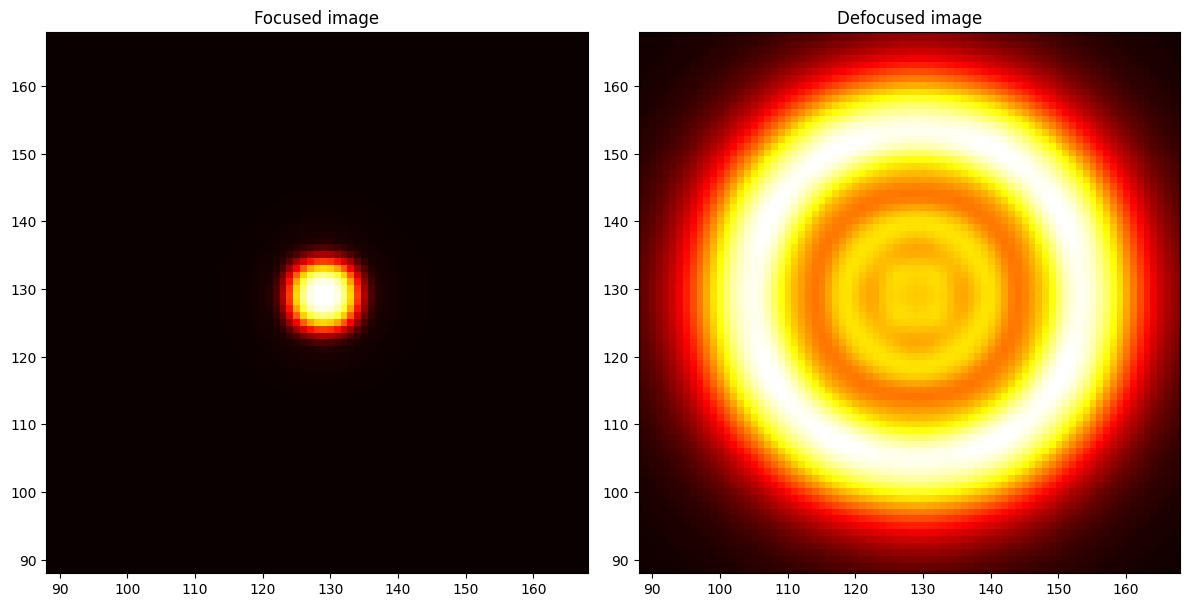

In [52]:
#illustrate focused and defocused images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Define limits for zooming in around the center (if necessary)
zoom_range = 40
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# plot extended image from before
axs[0].imshow(ext_image, cmap='hot')
axs[0].set_title("Focused image")
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)

# plot defocused image
axs[1].imshow(def_image, cmap='hot')
axs[1].set_title("Defocused image")
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

### Linear Combination of Effects
Consider now a linear combination of different effects, for example an image suffering from both spherical aberration and vertical coma.

In [53]:
affected_psf = full_effect_psf(circ_A, sph_aberr=20, vert_coma=20)

#compute the image using same (circular aperture with r=32) PSF
def_image = get_image(ext_source, affected_psf)

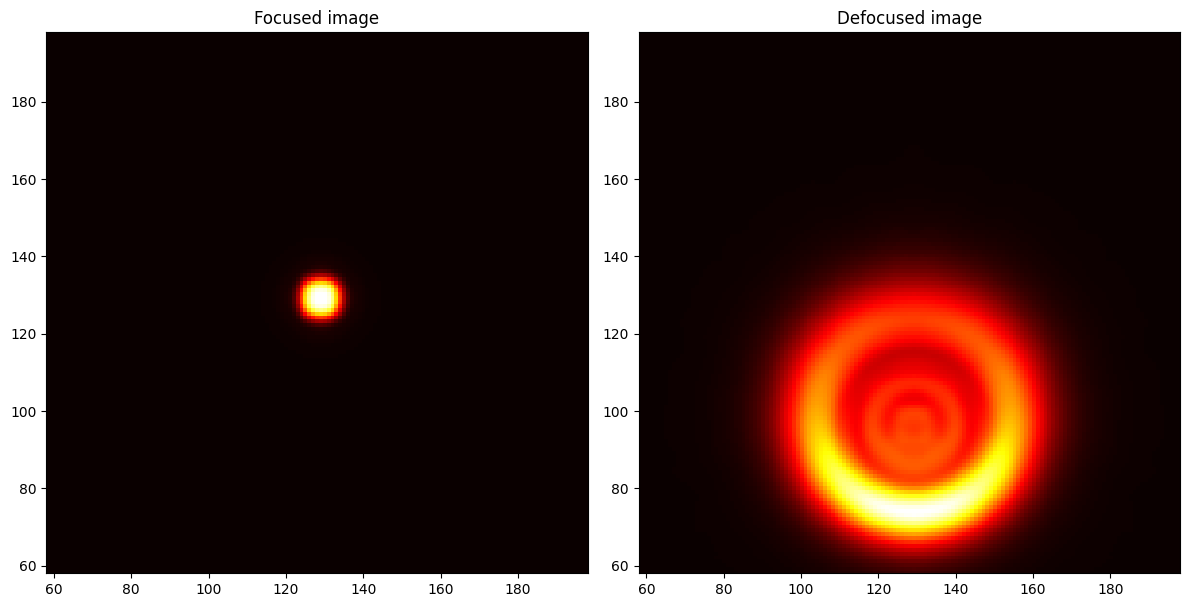

In [54]:
#illustrate focused and defocused images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Define limits for zooming in around the center (if necessary)
zoom_range = 70
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# plot extended image from before
axs[0].imshow(ext_image, cmap='hot')
axs[0].set_title("Focused image")
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)

# plot defocused image
axs[1].imshow(def_image, cmap='hot')
axs[1].set_title("Defocused image")
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

Consider a second example, this time of an image suffering from defocusing, spherical aberration and oblique astigmatism.

In [55]:
affected_psf = full_effect_psf(circ_A, defocus=40, sph_aberr=20, ob_astig=20)

#compute the image using same (circular aperture with r=32) PSF
def_image = get_image(ext_source, affected_psf)

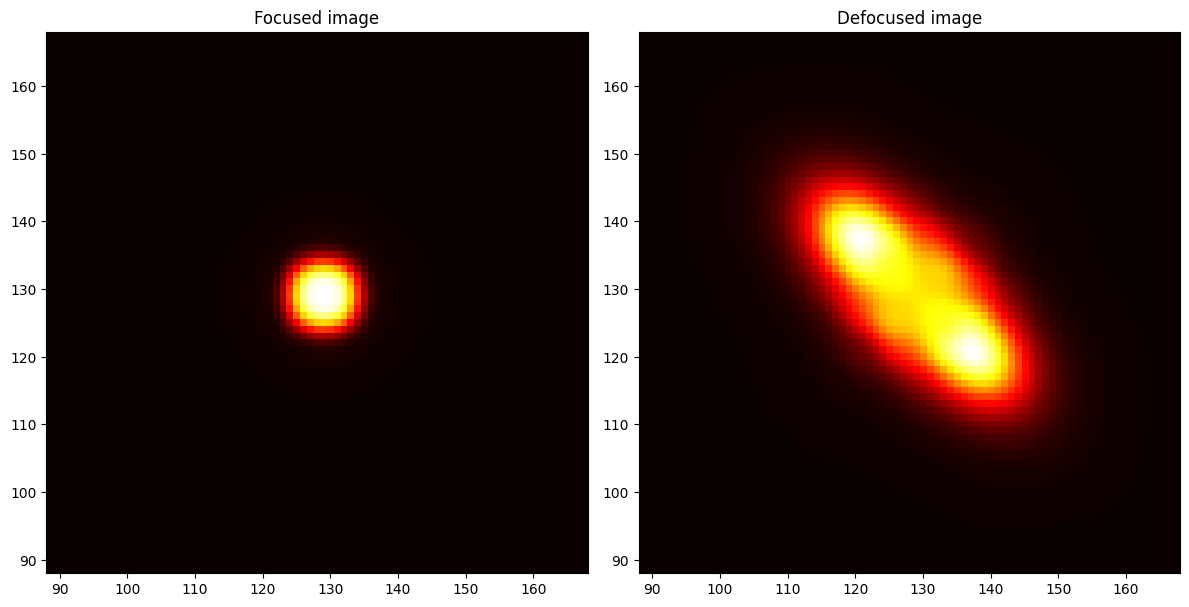

In [56]:
#illustrate focused and defocused images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Define limits for zooming in around the center (if necessary)
zoom_range = 40
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# plot extended image from before
axs[0].imshow(ext_image, cmap='hot')
axs[0].set_title("Focused image")
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)

# plot defocused image
axs[1].imshow(def_image, cmap='hot')
axs[1].set_title("Defocused image")
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

**Task 5:** Reflectors have a secondary mirror, which effectively reduces the aperture area. Compare the PSF and final image in the case of a telescope with a circular aperture (of your choice, on the same grid as in the first task) with a central obscuration of 0.1 and 0.5 radii of the telescope's primary mirror.

To simulate obstruction by this secondary mirror, we need to write a new aperture function which blocks a region in the centre.

In [57]:
#write function to create obstructed aperture
def obstructed_A(field_size, radius, obstruction_ratio):
    '''INPUTS
    field_size = size of the field
    radius = radius of circular aperture
    obstruction ratio = ratio of circular obstruction radius to circular aperture radius
    
    OUTPUTS
    obstructed circular aperture
    '''
    
    #create regular circular aperture
    aperture = circular_A(field_size, radius)
    
    #create field
    y, x = np.indices((field_size, field_size))
    center = field_size // 2

    #simulate obstruction
    obstruction_radius = int(radius * obstruction_ratio) #since we are working with discrete units (pixels)
    obstruction = (np.sqrt((x - center) ** 2 + (y - center) ** 2) <= obstruction_radius)
    aperture[obstruction] = 0  # Block central region (no longer open)
    return aperture

In [59]:
r = 32 #use our smallest circular aperture radius
obstr_ratio = 0.1

obstr_A = obstructed_A(field_size, r, obstr_ratio)

#compute the PSF
psf_obstr = get_psf(obstr_A)

image_obstr = get_image(p_source, psf_obstr)

In [61]:
#unobstructed aperture for comparison
circ_A=circular_A(field_size, r)

#compute the PSF
psf = get_psf(circ_A)

#compute the image
image = get_image(p_source, psf)

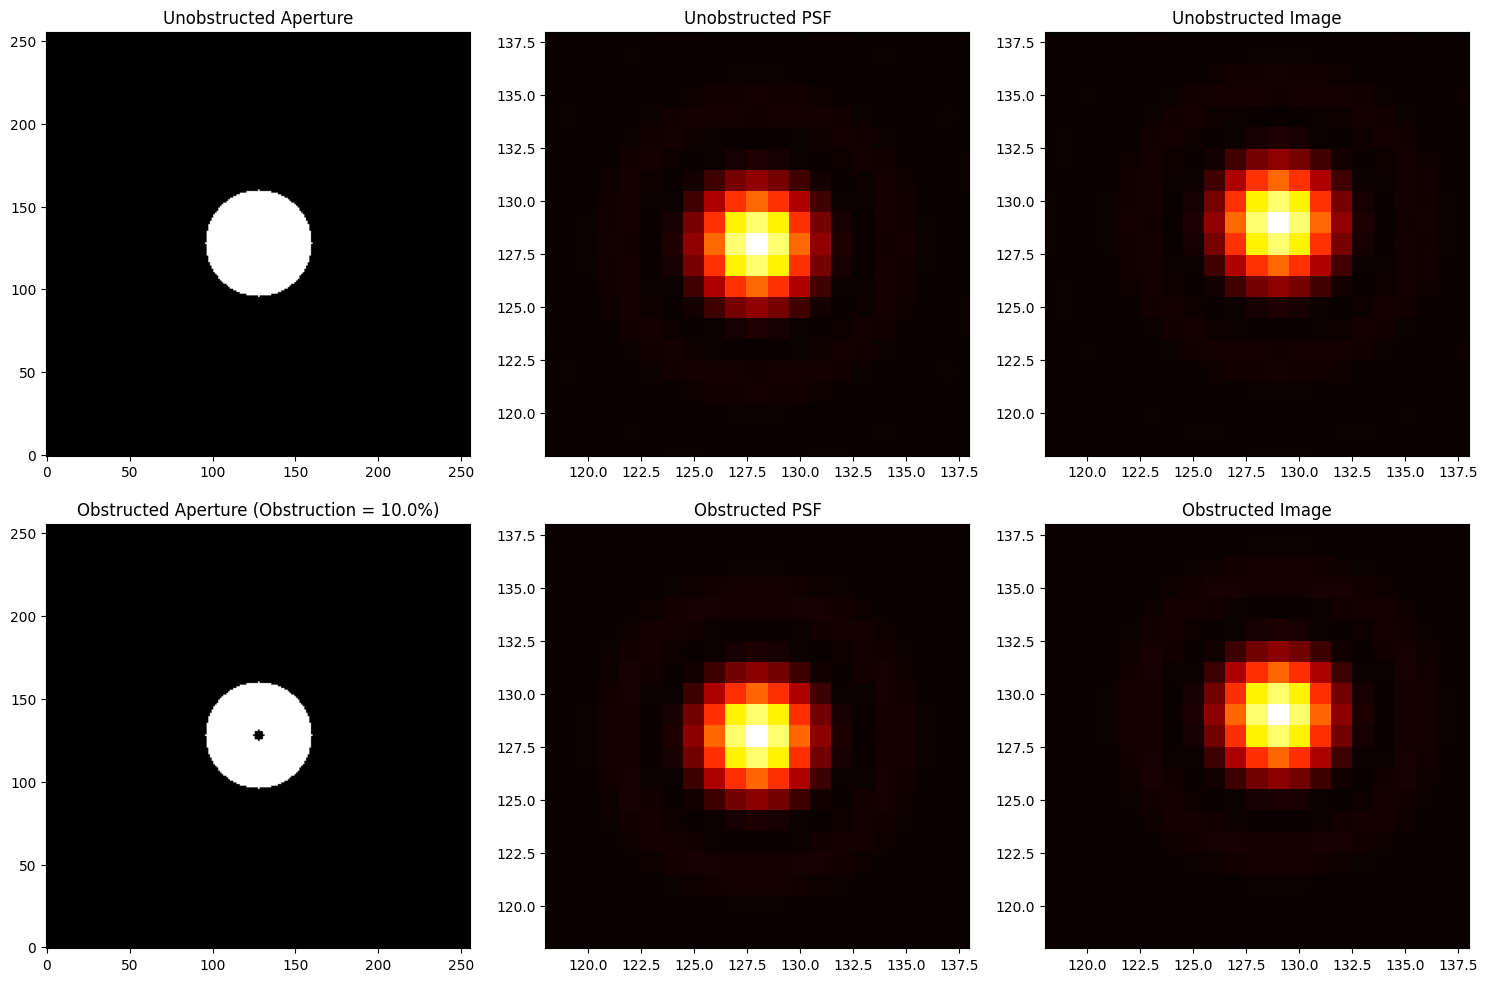

In [62]:
#plotting our results

zoom_range = 10
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# Set up the figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Row 1: Unobstructed Aperture, PSF, and Image
axs[0, 0].imshow(circ_A, cmap='gray', origin='lower')
axs[0, 0].set_title("Unobstructed Aperture")

axs[0, 1].imshow(psf, cmap='hot', origin='lower')
axs[0, 1].set_title("Unobstructed PSF")
axs[0, 1].set_xlim(x_min, x_max)
axs[0, 1].set_ylim(y_min, y_max)

axs[0, 2].imshow(image, cmap='hot', origin='lower')
axs[0, 2].set_title("Unobstructed Image")
axs[0, 2].set_xlim(x_min, x_max)
axs[0, 2].set_ylim(y_min, y_max)

# Row 2: Obstructed Aperture, PSF, and Image
axs[1, 0].imshow(obstr_A, cmap='gray', origin='lower')
axs[1, 0].set_title(f"Obstructed Aperture (Obstruction = {obstr_ratio * 100}%)")

axs[1, 1].imshow(psf_obstr, cmap='hot', origin='lower')
axs[1, 1].set_title("Obstructed PSF")
axs[1, 1].set_xlim(x_min, x_max)
axs[1, 1].set_ylim(y_min, y_max)

axs[1, 2].imshow(image_obstr, cmap='hot', origin='lower')
axs[1, 2].set_title("Obstructed Image")
axs[1, 2].set_xlim(x_min, x_max)
axs[1, 2].set_ylim(y_min, y_max)

# Display all figures
plt.tight_layout()
plt.show()

In [ ]:
r = 32 #use our smallest circular aperture radius
obstr_ratio = 0.5

obstr_A = obstructed_A(field_size, r, obstr_ratio)

#compute the PSF
psf_obstr = get_psf(obstr_A)

image_obstr = get_image(source, psf_obstr)

In [ ]:
#plotting our results

# Plotting parameters
zoom_range = 10
center = field_size // 2
x_min, x_max = center - zoom_range, center + zoom_range
y_min, y_max = center - zoom_range, center + zoom_range

# Set up the figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Row 1: Unobstructed Aperture, PSF, and Image
axs[0, 0].imshow(circ_A, cmap='gray', origin='lower')
axs[0, 0].set_title("Unobstructed Aperture")

axs[0, 1].imshow(psf, cmap='hot', origin='lower')
axs[0, 1].set_title("Unobstructed PSF")
axs[0, 1].set_xlim(x_min, x_max)
axs[0, 1].set_ylim(y_min, y_max)

axs[0, 2].imshow(image, cmap='hot', origin='lower')
axs[0, 2].set_title("Unobstructed Image")
axs[0, 2].set_xlim(x_min, x_max)
axs[0, 2].set_ylim(y_min, y_max)

# Row 2: Obstructed Aperture, PSF, and Image
axs[1, 0].imshow(obstr_A, cmap='gray', origin='lower')
axs[1, 0].set_title(f"Obstructed Aperture (Obstruction = {obstr_ratio * 100}%)")

axs[1, 1].imshow(psf_obstr, cmap='hot', origin='lower')
axs[1, 1].set_title("Obstructed PSF")
axs[1, 1].set_xlim(x_min, x_max)
axs[1, 1].set_ylim(y_min, y_max)

axs[1, 2].imshow(image_obstr, cmap='hot', origin='lower')
axs[1, 2].set_title("Obstructed Image")
axs[1, 2].set_xlim(x_min, x_max)
axs[1, 2].set_ylim(y_min, y_max)

# Display all figures
plt.tight_layout()
plt.show()

A larger obstruction gives a more noticable distortion pattern.

## References

[1] Hecht, Eugen, 2002. Optics, 4th edition, Pearson Education Inc., San Francisco.

[2] https://webs.optics.arizona.edu/gsmith/Zernike.html

[3] https://wp.optics.arizona.edu/jcwyant/miscellaneous/neat-graphics/zernike-polynomials/

[4] Dragana Ilić, lecture notes.